##**Integrantes:** 
##Bryan Andres García Villa 1017243061
##John Edison Orrego Muñoz  1035226171


##Taller 1 deeplearning - dataset CIFAR 10


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import accuracy
import tensorflow as tf
#from scikeras.wrappers import KerasRegressor

In [ ]:
df_Plant1_Generation = pd.read_csv("Plant_1_Generation_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
#df_Plant2_Generation = pd.read_csv("Plant_2_Generation_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
df_Plant1_Weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
#df_Plant2_Weather = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')

In [ ]:
df_Plant1_Generation.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [ ]:
df_Plant1_Generation.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
df_Plant1_Weather.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)

In [ ]:
#Formato de fecha
df_Plant1_Generation['DATE_TIME']= pd.to_datetime(df_Plant1_Generation['DATE_TIME'])
df_Plant1_Weather['DATE_TIME']= pd.to_datetime(df_Plant1_Weather['DATE_TIME'])

In [ ]:
#Se unen los datasets de las 2 plantas
plant1 = pd.merge(df_Plant1_Generation, df_Plant1_Weather, how='inner', on = 'DATE_TIME')

In [ ]:
df_generation = plant1

In [ ]:
df_generation.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0
3,2020-05-15,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0
4,2020-05-15,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0


In [ ]:
df_generation.shape

(45680, 8)

In [ ]:
caracteristicas = ['DC_POWER','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']
data_features = df_generation[['DC_POWER','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]

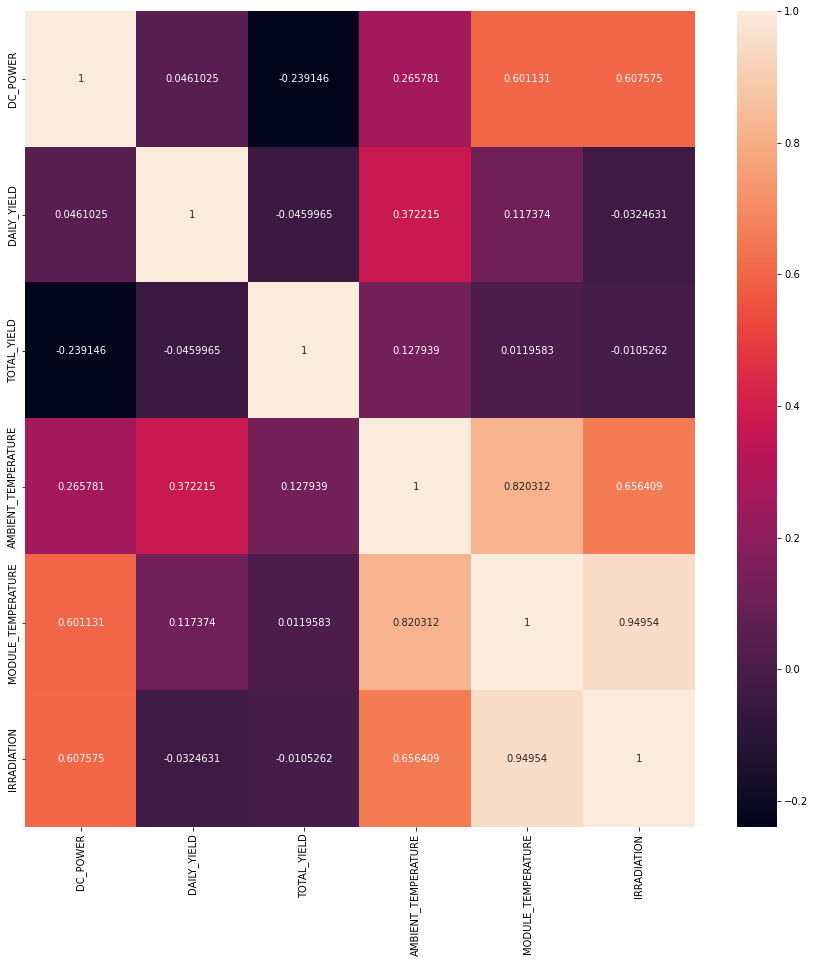

In [ ]:
Matriz_corr = data_features.corr()
plt.figure(figsize=(15,15))
ax = sns.heatmap(Matriz_corr, annot=True, fmt='g', xticklabels = caracteristicas, yticklabels = caracteristicas)
plt.show()

In [ ]:
X = df_generation[['DATE_TIME','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','IRRADIATION']].copy()
Y_AC = df_generation['AC_POWER'].copy()
Y_DC = df_generation['DC_POWER'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_AC, test_size=0.2, random_state= 1)

In [ ]:
data_time_test = X_test['DATE_TIME'].values

In [ ]:
X_train = X_train.drop(columns='DATE_TIME').values
X_test  = X_test.drop(columns='DATE_TIME').values

In [ ]:
st = KFold(n_splits= 5, shuffle=True) # Para cross validation

In [ ]:
metricas = []
mt_val_test = []

#**Modelo KNN**

In [ ]:
#Selección de los mejores parámetros para el modelo, se utilizará en la primera iteración el módelo KNeighbors
from sklearn.model_selection import GridSearchCV

#Número de vecinos a evaluar
k=[1,3,5,7,9,11]

knn = KNeighborsRegressor()

parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev']}

clf1 = GridSearchCV(estimator=knn, param_grid = parameters, cv=st, scoring='explained_variance',return_train_score=True)
clf1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]},
             return_train_score=True, scoring='explained_variance')

In [ ]:
#Se visualizan los mejores parametros de acuerdo al score
print(clf1.best_score_)
print(clf1.best_params_)

0.8862719213074369
{'metric': 'chebyshev', 'n_neighbors': 3}


In [ ]:
#Se realiza el entrenamiento del módelo de acuerdo a los mejores parámetros obtenidos
modelo_gen = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
modelo_gen.fit(X_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [ ]:
y_ac_pred = modelo_gen.predict(X_test)

In [ ]:
#Verificación de la varianza explicada y error cuadratico medio en test
print('explained_variance:',explained_variance_score(y_test, y_ac_pred) )
print('mean_squared_error:',mean_squared_error(y_test, y_ac_pred, squared= False))


explained_variance: 0.8948167605563513
mean_squared_error: 130.18751410648025


In [ ]:
mt_knn = ['KNN',clf1.best_score_,explained_variance_score(y_test, y_ac_pred)]
mt_val_test.append(mt_knn)

In [ ]:
mtr_knn = ['KNN',explained_variance_score(y_test, y_ac_pred),mean_squared_error(y_test, y_ac_pred, squared= False), \
          max_error(y_test, y_ac_pred), r2_score(y_test, y_ac_pred), median_absolute_error(y_test,y_ac_pred)]
metricas.append(mtr_knn)

In [ ]:
df_prediction_knn = pd.DataFrame({'DATE_TIME':data_time_test,'Y_AC':y_test,'Y_AC_PRED':y_ac_pred})

In [ ]:
df_prediction_knn.sort_values(by='DATE_TIME', ignore_index=True, inplace=True)

In [ ]:
df_prediction_knn.head()

,DATE_TIME,Y_AC,Y_AC_PRED
0,2020-05-15 00:00:00,0.0,0.0
1,2020-05-15 00:00:00,0.0,0.0
2,2020-05-15 00:15:00,0.0,0.0
3,2020-05-15 00:15:00,0.0,0.0
4,2020-05-15 00:15:00,0.0,0.0


In [ ]:
df_prediction_knn.shape

(9136, 3)

In [ ]:
df_predKnn_graf = df_prediction_knn[7000:9136]

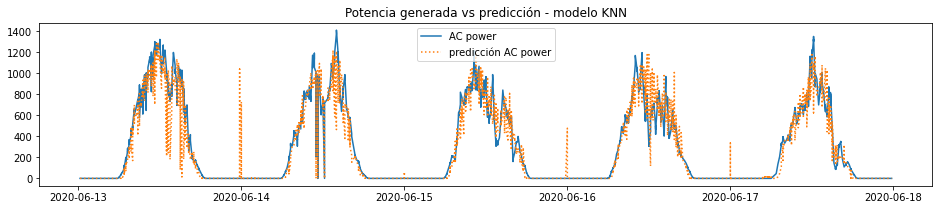

In [ ]:
plt.figure(figsize=(16,3))
plt.plot(df_predKnn_graf['DATE_TIME'],df_predKnn_graf['Y_AC'],label='AC power')
plt.plot(df_predKnn_graf['DATE_TIME'],df_predKnn_graf['Y_AC_PRED'],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - modelo KNN")
plt.show()

#**Random Forest**

In [ ]:
model_rf = RandomForestRegressor(n_estimators= 8, random_state=0)

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=8, random_state=0)

In [ ]:
#CrossValidation randomForest
score_cv_rf = cross_val_score(model_rf, X_train, y_train, cv=st, scoring="explained_variance")

In [ ]:
print("V. explicada - validación:",score_cv_rf.mean())

V. explicada - validación: 0.9887378758826475


In [ ]:
y_ac_pred_rf = model_rf.predict(X_test)

In [ ]:
#Verificación de la varianza explicada y error cuadratico medio en test
print('explained_variance:',explained_variance_score(y_test, y_ac_pred_rf) )
print('mean_squared_error:',mean_squared_error(y_test, y_ac_pred_rf, squared= False))
print('Max error:',max_error(y_test, y_ac_pred_rf))
print('R2 score:',r2_score(y_test, y_ac_pred_rf))
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,y_ac_pred_rf))

explained_variance: 0.98977868302955
mean_squared_error: 40.27593762865632
Max error: 973.264732125
R2 score: 0.9897733223585594
mean_absolute_percentage_error: 1042076793457805.2


In [ ]:
mt_rf = ['R. forest',score_cv_rf.mean(),explained_variance_score(y_test, y_ac_pred_rf)]
mt_val_test.append(mt_rf)

In [ ]:
mtr_rf = ['R. forest',explained_variance_score(y_test, y_ac_pred_rf),mean_squared_error(y_test, y_ac_pred_rf, squared= False), \
          max_error(y_test, y_ac_pred_rf), r2_score(y_test, y_ac_pred_rf), median_absolute_error(y_test,y_ac_pred_rf)]
metricas.append(mtr_rf)

In [ ]:
df_prediction_rf = pd.DataFrame({'DATE_TIME':data_time_test,'Y_AC':y_test,'Y_AC_PRED':y_ac_pred_rf})

In [ ]:
df_prediction_rf.sort_values(by='DATE_TIME', ignore_index=True, inplace=True)

In [ ]:
df_predRf_graf = df_prediction_rf[7000:9136]

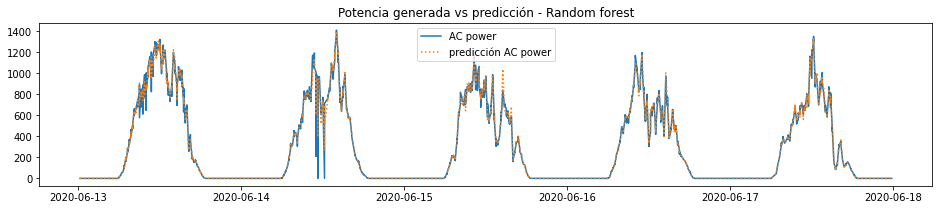

In [ ]:
plt.figure(figsize=(16,3))
plt.plot(df_predRf_graf['DATE_TIME'],df_predRf_graf['Y_AC'],label='AC power')
plt.plot(df_predRf_graf['DATE_TIME'],df_predRf_graf['Y_AC_PRED'],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - Random forest")
plt.show()

#**Grandient Boosting**

In [ ]:
model_gb = GradientBoostingRegressor(n_estimators= 500, loss= 'squared_error', random_state= 0)

In [ ]:
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=0)

In [ ]:
#CrossValidation GradientBoosting
score_cv_gb = cross_val_score(model_gb, X_train, y_train, cv=st, scoring="explained_variance")

In [ ]:
score_cv_gb

array([0.99106487, 0.9909821 , 0.99016189, 0.99102579, 0.98936238])

In [ ]:
print("V. explicada - validación:",score_cv_gb.mean())

V. explicada - validación: 0.9905194055425071


In [ ]:
y_ac_pred_gb = model_gb.predict(X_test)

In [ ]:
#Verificación de la varianza explicada y error cuadratico medio en test
print('explained_variance:',explained_variance_score(y_test, y_ac_pred_gb) )
print('mean_squared_error:',mean_squared_error(y_test, y_ac_pred_gb, squared= False))
print('Max error:',max_error(y_test, y_ac_pred_gb))
print('R2 score:',r2_score(y_test, y_ac_pred_gb))
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,y_ac_pred_gb))
print('median_absolute_error:',median_absolute_error(y_test,y_ac_pred_gb))

explained_variance: 0.9906359404019282
mean_squared_error: 38.551449047443796
Max error: 1024.0208847429994
R2 score: 0.9906303221164232
mean_absolute_percentage_error: 2992011986738971.5
median_absolute_error: 2.3805524338312054


In [ ]:
mt_gb = ['G. boosting',score_cv_gb.mean(),explained_variance_score(y_test, y_ac_pred_gb)]
mt_val_test.append(mt_gb)

In [ ]:
mtr_gb = ['G. boosting',explained_variance_score(y_test, y_ac_pred_gb),mean_squared_error(y_test, y_ac_pred_gb, squared= False), \
          max_error(y_test, y_ac_pred_gb), r2_score(y_test, y_ac_pred_gb), median_absolute_error(y_test,y_ac_pred_gb)]
metricas.append(mtr_gb)

In [ ]:
df_prediction_gb = pd.DataFrame({'DATE_TIME':data_time_test,'Y_AC':y_test,'Y_AC_PRED':y_ac_pred_gb})

In [ ]:
df_prediction_gb.sort_values(by='DATE_TIME', ignore_index=True, inplace=True)

In [ ]:
df_predGb_graf = df_prediction_gb[7000:9136]

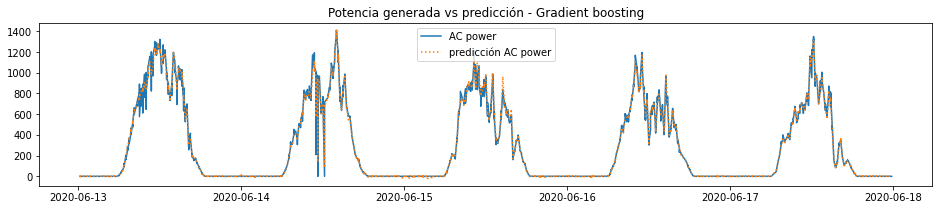

In [ ]:
plt.figure(figsize=(16,3))
plt.plot(df_predGb_graf['DATE_TIME'],df_predGb_graf['Y_AC'],label='AC power')
plt.plot(df_predGb_graf['DATE_TIME'],df_predGb_graf['Y_AC_PRED'],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - Gradient boosting")
plt.show()

#**SVR**

In [ ]:
model_svr_rbf = SVR(kernel='rbf',C=200, gamma=0.0001)

In [ ]:
model_svr_rbf.fit(X_train, y_train)

SVR(C=200, gamma=0.0001)

In [ ]:
#CrossValidation GradientBoosting
score_cv_svr = cross_val_score(model_svr_rbf, X_train, y_train, cv=st, scoring="explained_variance")

In [ ]:
y_ac_pred_svr = model_svr_rbf.predict(X_test)

In [ ]:
#Verificación de la varianza explicada y error cuadratico medio en test
print('explained_variance:',explained_variance_score(y_test, y_ac_pred_svr) )
print('mean_squared_error:',mean_squared_error(y_test, y_ac_pred_svr, squared= False))
print('Max error:',max_error(y_test, y_ac_pred_svr))
print('R2 score:',r2_score(y_test, y_ac_pred_svr))
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,y_ac_pred_svr))
print('median_absolute_error:',median_absolute_error(y_test,y_ac_pred_svr))

explained_variance: 0.7707866813497714
mean_squared_error: 197.21521138954586
Max error: 805.9274856915752
R2 score: 0.7547979672521807
mean_absolute_percentage_error: 1.0304537709290744e+16
median_absolute_error: 13.953606862295956


In [ ]:
mt_svr = ['SVR',score_cv_svr.mean(),explained_variance_score(y_test, y_ac_pred_svr)]
mt_val_test.append(mt_svr)

In [ ]:
mtr_svr = ['SVR',explained_variance_score(y_test, y_ac_pred_svr),mean_squared_error(y_test, y_ac_pred_svr, squared= False), \
          max_error(y_test, y_ac_pred_svr), r2_score(y_test, y_ac_pred_svr), median_absolute_error(y_test,y_ac_pred_svr)]
metricas.append(mtr_svr)

In [ ]:
df_prediction_svr = pd.DataFrame({'DATE_TIME':data_time_test,'Y_AC':y_test,'Y_AC_PRED':y_ac_pred_svr})

In [ ]:
df_prediction_svr.sort_values(by='DATE_TIME', ignore_index=True, inplace=True)

In [ ]:
df_predSVR_graf = df_prediction_svr[7000:9136]

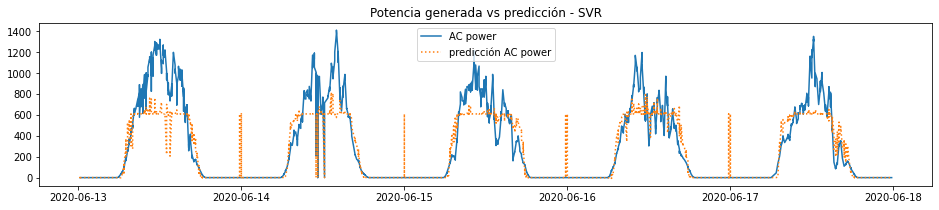

In [ ]:
plt.figure(figsize=(16,3))
plt.plot(df_predSVR_graf['DATE_TIME'],df_predSVR_graf['Y_AC'],label='AC power')
plt.plot(df_predSVR_graf['DATE_TIME'],df_predSVR_graf['Y_AC_PRED'],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - SVR")
plt.show()

#**Regresión Lineal**

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
score_cv_lr = cross_val_score(model_lr, X_train, y_train, cv=st, scoring="explained_variance")

In [ ]:
score_cv_lr

array([0.98106298, 0.98395534, 0.98285337, 0.98254524, 0.9817749 ])

In [ ]:
print("V. explicada - validación:",score_cv_lr.mean())

V. explicada - validación: 0.9824383655897911


In [ ]:
y_ac_pred_lr = model_lr.predict(X_test)

In [ ]:
#Verificación de la varianza explicada y error cuadratico medio en test
print('explained_variance:',explained_variance_score(y_test, y_ac_pred_lr) )
print('mean_squared_error:',mean_squared_error(y_test, y_ac_pred_lr, squared= True))
print('Max error:',max_error(y_test, y_ac_pred_lr))
print('R2 score:',r2_score(y_test, y_ac_pred_lr))
print('mean_absolute_percentage_error:',mean_absolute_percentage_error(y_test,y_ac_pred_lr))
print('median_absolute_error:',median_absolute_error(y_test,y_ac_pred_lr))

explained_variance: 0.9843153460075144
mean_squared_error: 2488.2210814745094
Max error: 1074.4291834510138
R2 score: 0.9843132775440914
mean_absolute_percentage_error: 1.516289505867968e+16
median_absolute_error: 9.712220918973301


In [ ]:
mt_lr = ['Reg. lineal',score_cv_lr.mean(),explained_variance_score(y_test, y_ac_pred_lr)]
mt_val_test.append(mt_lr)

In [ ]:
mtr_lr = ['Reg. lineal',explained_variance_score(y_test, y_ac_pred_lr),mean_squared_error(y_test, y_ac_pred_lr, squared= False), \
          max_error(y_test, y_ac_pred_lr), r2_score(y_test, y_ac_pred_lr), median_absolute_error(y_test,y_ac_pred_lr)]
metricas.append(mtr_lr)

In [ ]:
y_ac_pred_lr.shape

(9136,)

In [ ]:
df_prediction_lr = pd.DataFrame({'DATE_TIME':data_time_test,'Y_AC':y_test,'Y_AC_PRED':y_ac_pred_lr})

In [ ]:
df_prediction_lr.sort_values(by='DATE_TIME', ignore_index=True, inplace=True)

In [ ]:
df_predLr_graf = df_prediction_lr[7000:9136]

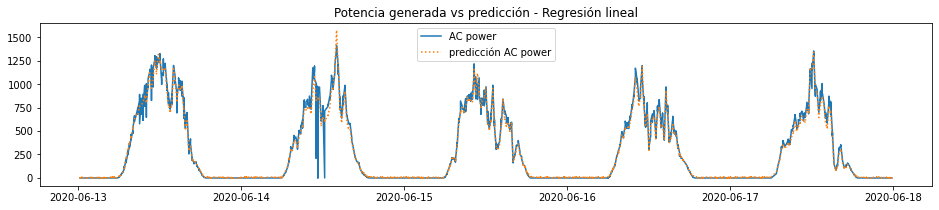

In [ ]:
plt.figure(figsize=(16,3))
plt.plot(df_predLr_graf['DATE_TIME'],df_predLr_graf['Y_AC'],label='AC power')
plt.plot(df_predLr_graf['DATE_TIME'],df_predLr_graf['Y_AC_PRED'],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - Regresión lineal")
plt.show()

#**TABLAS**


In [ ]:
df_val_test = pd.DataFrame(mt_val_test, columns=['Modelo','Score_validación','Score_test'], index=None)

In [ ]:
df_val_test

,Modelo,Score_validación,Score_test
0,KNN,0.886272,0.894817
1,R. forest,0.988738,0.989779
2,G. boosting,0.990519,0.990636
3,Reg. lineal,0.982438,0.984315
4,SVR,0.745373,0.990636
5,SVR,0.745373,0.770787
6,SVR,0.745373,0.770787


In [ ]:
df_val_test

,Modelo,Score_validación,Score_test
0,KNN,0.886272,0.894817
1,R. forest,0.988738,0.989779
2,G. boosting,0.990519,0.990636
3,Reg. lineal,0.982438,0.984315


In [ ]:
df_metricas = pd.DataFrame(metricas, columns=['Modelo','Expl_var','RMSE','Max_error','R2','MedAE'], index=None)

In [ ]:
df_metricas

,Modelo,Expl_var,RMSE,Max_error,R2,MedAE
0,KNN,0.894817,130.187514,1222.696429,0.893148,9.349405
1,R. forest,0.989779,40.275938,973.264732,0.989773,0.404353
2,G. boosting,0.990636,38.551449,1024.020885,0.990630,2.380552
3,Reg. lineal,0.984315,49.882072,1074.429183,0.984313,9.712221
4,SVR,0.770787,197.215211,805.927486,0.754798,13.953607
